# Pesticide Project (Classification)

Table of Contents
1.  Data Preprocessing
2.  Data Visualization
3.  EDA
4.  Splitting & Sending data to model
5.  Using Ensemble techniques
6.  Using GridsearchCV
7.  Best Model
8.  Cross Validation
9.  Saving the Model
10. Test data preprocessing
11. Test data EDA
12. Puting Test data in best model

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train_agri.csv")
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [3]:
df['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [4]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [5]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

we have Null values in one column . we can fill that with mean

In [6]:
df['Number_Weeks_Used'].fillna(int(df['Number_Weeks_Used'].mean()), inplace=True)

In [7]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

# Data Visualization

<function matplotlib.pyplot.show(*args, **kw)>

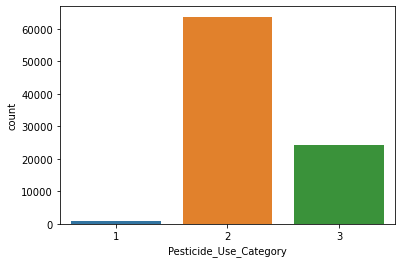

In [8]:
sns.countplot(x="Pesticide_Use_Category",data=df)
plt.show
#its clear from below graph that 2nd type of Pestiside has been used more often

<function matplotlib.pyplot.show(*args, **kw)>

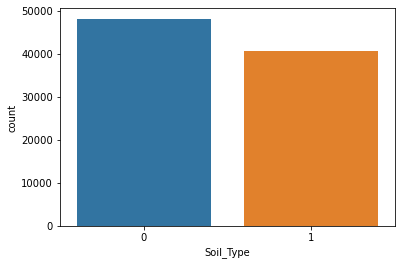

In [9]:
sns.countplot(x="Soil_Type",data=df)
plt.show
#we can say that there are only two type of soil and there is little differce in total area

<function matplotlib.pyplot.show(*args, **kw)>

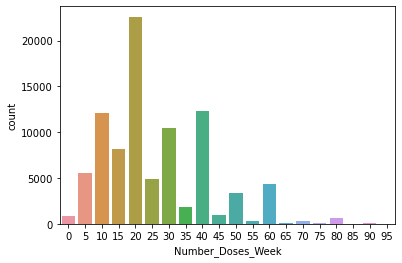

In [10]:
sns.countplot(x="Number_Doses_Week",data=df)
plt.show


There are clear visible variation in number of doses per week. Most have chosen 20 doses . Only few of farmers have gone for high Doses 

<function matplotlib.pyplot.show(*args, **kw)>

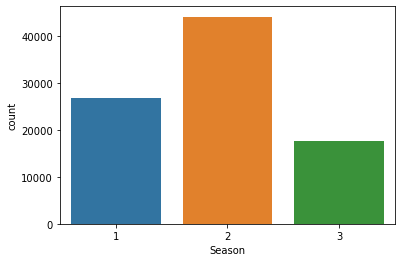

In [11]:
sns.countplot(x="Season",data=df)
plt.show
#it is clear that most have opted pesticide for two seasons. There are less farmers who opted for 3 seasons

<function matplotlib.pyplot.show(*args, **kw)>

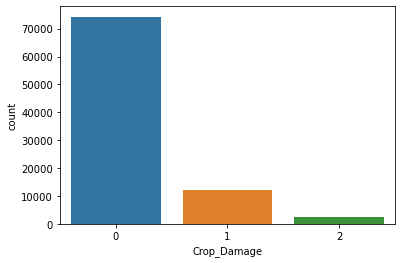

In [12]:
sns.countplot(x="Crop_Damage",data=df)
plt.show

We can see from above plot that there are mostly no damage of Crop. Some had faced one season damage and a little had faced two seasons damage. but there is no one who had faced all 3 seasons damage

In [13]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [14]:
df.drop('ID',axis=1,inplace=True)

# EDA

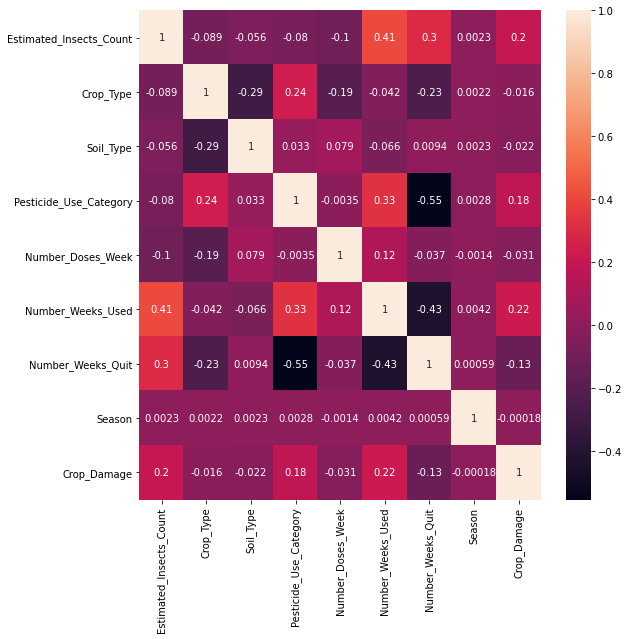

In [15]:
#heatmap correlation

import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Estimated_Insects_Count       AxesSubplot(0.125,0.772143;0.110714x0.107857)
Crop_Type                  AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Soil_Type                  AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Pesticide_Use_Category     AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Number_Doses_Week          AxesSubplot(0.656429,0.772143;0.110714x0.107857)
Number_Weeks_Used          AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Number_Weeks_Quit             AxesSubplot(0.125,0.642714;0.110714x0.107857)
Season                     AxesSubplot(0.257857,0.642714;0.110714x0.107857)
Crop_Damage                AxesSubplot(0.390714,0.642714;0.110714x0.107857)
dtype: object

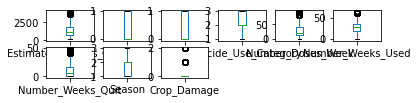

In [16]:
# checking outliers
df.plot.box(subplots=True,layout=(6,6))

In [17]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df=df.loc[(z<3).all(axis=1)]
print(df.shape)

(88858, 9)
(84853, 9)


In [18]:
df.skew()

Estimated_Insects_Count    0.802312
Crop_Type                  0.939630
Soil_Type                  0.165963
Pesticide_Use_Category     0.857490
Number_Doses_Week          0.745649
Number_Weeks_Used          0.278955
Number_Weeks_Quit          0.792407
Season                     0.145248
Crop_Damage                2.065124
dtype: float64

In [19]:
#lets treat the skewness in the input dataset
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.sqrt(df[index])

In [20]:
df.skew()

Estimated_Insects_Count   -0.008714
Crop_Type                  0.939630
Soil_Type                  0.165963
Pesticide_Use_Category     0.606849
Number_Doses_Week         -3.099629
Number_Weeks_Used          0.278955
Number_Weeks_Quit         -0.369121
Season                     0.145248
Crop_Damage                2.065124
dtype: float64

# Splitting and Sending Data to Model

In [21]:
#splitting the data for training and test

x=df.drop(columns=['Crop_Damage'])
y=df['Crop_Damage']

In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>max_score:
        max_score=score
        final_r_state=r_state
print("Maximimum Accuracy Score is",max_score,'at',final_r_state)


Maximimum Accuracy Score is 0.8646514642625656 at 88


In [24]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=88)

model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of LogisticRegression() is:
0.8646514642625656
[[14480   178]
 [ 2119   194]]
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     14658
         1.0       0.52      0.08      0.14      2313

    accuracy                           0.86     16971
   macro avg       0.70      0.54      0.54     16971
weighted avg       0.82      0.86      0.82     16971



Accuracy Score of SVC() is:
0.8696010842024631
[[14535   123]
 [ 2090   223]]
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     14658
         1.0       0.64      0.10      0.17      2313

    accuracy                           0.87     16971
   macro avg       0.76      0.54      0.55     16971
weighted avg       0.84      0.87      0.83     16971



Accuracy Score of KNeighborsClassifier() is:
0.8578162748217547
[[13985   673]
 [ 1740   573]]
              precision    recall  f1-score   support

         0.0       0.

# Using Enseble Technique

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=88)   #estimator is 100 by default can change it 50,100,150...
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.8565788698367804
[[14005   653]
 [ 1781   532]]
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     14658
         1.0       0.45      0.23      0.30      2313

    accuracy                           0.86     16971
   macro avg       0.67      0.59      0.61     16971
weighted avg       0.83      0.86      0.84     16971



After applying ensemble technique we can see that we are getting maximum accuracy with Logistic Regression. so we can save our Model with Logistic Regression.

# Using GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV
# using GridsearchCV ti fing best parmeters of logistic regression
lg=LogisticRegression()
parameters={'C':[1,10],'random_state':range(42,100)}
clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
clf.best_params_

{'C': 1, 'random_state': 42}

# selecting Best Model

In [27]:
#so we get the best result in logistic regression model
lg=LogisticRegression(C=1,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))
print('classification report:',classification_report(y_test,pred))

Accuracy score: 0.8646514642625656
confusion matrix: [[14480   178]
 [ 2119   194]]
classification report:               precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     14658
         1.0       0.52      0.08      0.14      2313

    accuracy                           0.86     16971
   macro avg       0.70      0.54      0.54     16971
weighted avg       0.82      0.86      0.82     16971



# Cross Validation

In [28]:
# cross validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(lg,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.85940722 0.85822874 0.8591126  0.85898645 0.85945787]
0.8590385769172528 0.00044175401361598864


# Saving the model

In [29]:
# saving the model

import joblib
joblib.dump(lg,'pesticide.obj') 

['pesticide.obj']

Now we have test data .Before putting test data into the model we have to do EDA of test data

# Test  Data Preprocessing

In [30]:
df_test=pd.read_csv("test_agriculture.csv")
df_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [31]:
df_test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [32]:
df_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [33]:
df_test['Number_Weeks_Used'].fillna(int(df_test['Number_Weeks_Used'].mean()), inplace=True)

In [34]:
df_test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

# EDA of Test Data

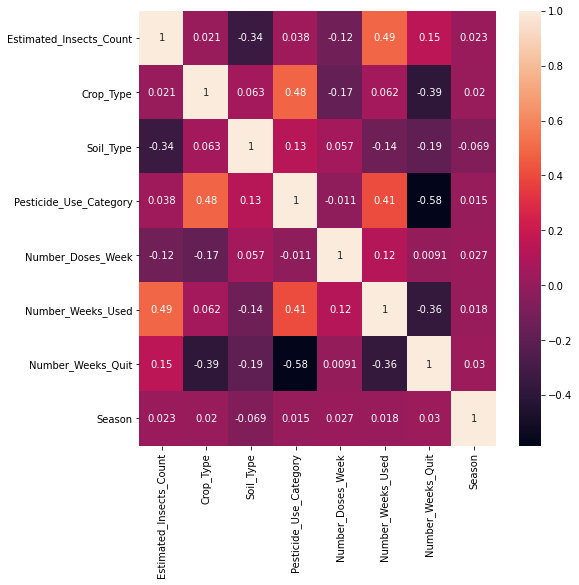

In [35]:
#heatmap correlation

import seaborn as sns
corr_hmap=df_test.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Estimated_Insects_Count       AxesSubplot(0.125,0.772143;0.110714x0.107857)
Crop_Type                  AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Soil_Type                  AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Pesticide_Use_Category     AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Number_Doses_Week          AxesSubplot(0.656429,0.772143;0.110714x0.107857)
Number_Weeks_Used          AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Number_Weeks_Quit             AxesSubplot(0.125,0.642714;0.110714x0.107857)
Season                     AxesSubplot(0.257857,0.642714;0.110714x0.107857)
dtype: object

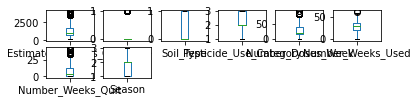

In [36]:
# checking outliers
df_test.plot.box(subplots=True,layout=(6,6))

In [37]:
df_test.drop('ID',axis=1,inplace=True)

In [38]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df_test))
print(df_test.shape)
df_test=df_test.loc[(z<3).all(axis=1)]
print(df_test.shape)

(1199, 8)
(1160, 8)


In [39]:
df_test.skew()

Estimated_Insects_Count    1.013185
Crop_Type                  1.515496
Soil_Type                  0.148878
Pesticide_Use_Category     0.069452
Number_Doses_Week          0.645208
Number_Weeks_Used          0.224662
Number_Weeks_Quit          1.032108
Season                     0.159728
dtype: float64

In [40]:
#lets treat the skewness in the input dataset
for index in df_test.skew().index:
    if df_test.skew().loc[index]>0.5:
        df_test[index]=np.cbrt(df_test[index])
    if df_test.skew().loc[index]<-0.5:
        df_test[index]=np.sqrt(df_test[index])

In [41]:
df_test.skew()

Estimated_Insects_Count    0.193896
Crop_Type                  1.515496
Soil_Type                  0.148878
Pesticide_Use_Category     0.069452
Number_Doses_Week         -3.577786
Number_Weeks_Used          0.224662
Number_Weeks_Quit          0.125611
Season                     0.159728
dtype: float64

# Putting Test Data in Model

In [42]:
#Now we put test data in our model
lg.predict(df_test)

array([1., 1., 1., ..., 1., 1., 1.])